### Import Libraries

In [3]:
from pathlib import Path

from arcgis.apps.storymap import StoryMap, Map, Image, Text, Scales
from arcgis.gis import GIS

### Connect to GIS

In [4]:
gis = GIS(profile="your_profile")

### Find the Feature Layer Collection item
A Feature Layer Collection of utility-scale wind turbines in the United States

<Item title:"US_Wind_Turbine_Locations" type:Feature Layer Collection owner:jyaist_geosaurus>
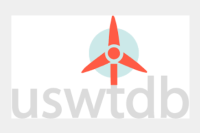

In [5]:
wind_item = gis.content.search("Wind*", "Feature Layer")[0]
wind_item

### Get the Feature Layer from the item 

In [6]:
us_wind_layer = wind_item.layers[0]

In [7]:
print(f"The {us_wind_layer.properties.name} has {us_wind_layer.query(return_count_only=True)} features")

The US_Wind_Turbine_Locations has 70808 features


### Query the layer to get a DataFrame to retrieve a list of unique values in a field
In this case, a list of the states in the United States that have utility scale wind turbines

In [8]:
us_wind_df = us_wind_layer.query(where="1=1", as_df=True)

In [9]:
state_list = list(us_wind_df.t_state.unique())

In [10]:
for a,b,c,d,e in zip(state_list[::5], state_list[1::5], state_list[2::5],state_list[3::5],state_list[4::5]):
    print(f"{a:5}{b:5}{c:5}{d:5}{e:5}")
print(f"{state_list[45]}")

CA   IA   MA   OH   MN   
IL   NE   WY   KS   NC   
PA   OK   ND   SD   TX   
NM   NH   MI   NY   IN   
NJ   WA   MT   OR   CO   
WV   HI   PR   AK   AR   
ME   WI   RI   MO   VT   
UT   ID   TN   VA   MD   
AZ   GU   CT   NV   DE   
FL


### Use the list of States to:
* create a hosted feature layer item of turbines in that state
* create a Web Map item with that layer
* create a StoryMap about Wind Turbines in that state

In [11]:
# Assign a variable to a Path containing images for use as thumbnails
img_dir = Path(r"/path/to/your/image/directory" # change this to a directory you will use that has images
if not "uswtb_data" in [f["title"] for f in gis.users.me.folders]:
    gis.content.create_folder("uswtb_data")
else:
    pass

for st in state_list[:5]:
    # create individual state wind turbine feature layer from entire US wind turbine feature layer
    new_df = us_wind_layer.query(where=f"t_state = '{st}'", as_df=True)
    st_flyr = new_df.spatial.to_featurelayer(title=f"{st}_wind_turbines",
                                             tags="uswtb_db,wind,energy",
                                             folder="uswtb_data",
                                             service_name=f"{st}_uswtb_data")
    print(f"..{st_flyr.title} Feature Layer Collection item created")
    # create individual state web map of wind turbines
    m = gis.map()
    m.add_layer(st_flyr)
    m.extent = st_flyr.extent
    map_item = m.save(item_properties={"title":f"{st}_wind_turbines",
                                       "tags":"uswtb,wind energy,utility-scale",
                                       "snippet":f"Wind turbines from the USWTB database in {st}",
                                       "summary":f"Wind turbines from the USWTB database in {st}",
                                       "description":"Downloaded from https://eerscmap.usgs.gov/uswtdb/data/"},
                      folder="uswtb_data")
    print(f"....{map_item.title} Web map item created")
    # initialize brand new StoryMap object
    new_story = StoryMap()
    # initialize storymap module Map object
    story_map = Map(map_item.id)
    # assign variable for image name
    img_name = f"{st.lower()}_wtb.jpg" #change this to match the name of your image
    # initialize storymap module Image object
    story_image = Image(path=str(img_dir / img_name))
    # initialize storymap module Text object
    story_text = Text(text=f"Initial Text to demonstrate a StoryMap for {st} Wind Turbines.",
                      custom_color="355e3b")
    # add map node to storymap
    map_node = new_story.add(content=story_map, caption=f"Map of {st} wind turbines.")
    story_map.set_viewpoint(extent=st_flyr.extent, scale=Scales.STATE)
    # add image node to storymap
    img_node = new_story.add(content=story_image, caption=f"Wind farm in {st}")
    # add text node to storymap
    text_node = new_story.add(content=story_text, caption=f"Text for {st} story map.")
    # assign variable for storymap cover image
    cover_img_name = f"{st.lower()}_windscapes.jpg"
    # add image as storymap cover
    new_story.cover(title=f"{st} Wind Turbines",
                    summary="States lead the way on alternative energy.",
                    image=Image(path=str(img_dir / cover_img_name)))
    # save the storymap
    ns = new_story.save(title=f"Wind Turbines in {st}",
                        tags=f"wind energy,uswtb database,USGS data,{st}",
                        access="org",
                        publish=False)
    print(f"......{ns.title} StoryMap item created")
    print("\n")

..CA_wind_turbines Feature Layer Collection item created
....CA_wind_turbines Web map item created
......Wind Turbines in CA StoryMap item created


..IA_wind_turbines Feature Layer Collection item created
....IA_wind_turbines Web map item created
......Wind Turbines in IA StoryMap item created


..MA_wind_turbines Feature Layer Collection item created
....MA_wind_turbines Web map item created
......Wind Turbines in MA StoryMap item created


..OH_wind_turbines Feature Layer Collection item created
....OH_wind_turbines Web map item created
......Wind Turbines in OH StoryMap item created


..MN_wind_turbines Feature Layer Collection item created
....MN_wind_turbines Web map item created
......Wind Turbines in MN StoryMap item created


